# Components

In gdsfactory, we create components and then connect them together to create larger, more complicated designs. Components can be simply shapes, or they can contain references to other components, and they usually have ports which allow you to connect the component to other components. You can find more information about components in the gdsfactory [components page](https://gdsfactory.github.io/gdsfactory/notebooks/00_geometry.html).

## Parts of a Component
#### TODO: Add something more here

### Geometry TODO


### Ports

### Layers

## Creating Components
### TODO: Create a component using polygons

### How to Create a Component from a GDSII file

Sometimes it will be necessary to import a gds file into gdsfactory. This can happen if you have created a geometry using some other software, such as meep, and you would like the use the geometry in gdsfactory. While gdsfactory has built in functions to do some portions of the process, there are several other steps that are necessary. 

The purpose of this notebook is to demonstrate the steps needed to create a complete gdsfactory component from a gds file.

 

For this example, I'll be using a gds of a splitter that was designed in Meep. 

This is an picture of the gds we will convert to a component:
![Image of splitter file](https://raw.githubusercontent.com/BYUCamachoLab/Photonics-Bootcamp/main/book/images/Notebook_Images/compFromGdsTutorial1.png)

Here we go!

We'll just be using gdsfactory here, so we'll include that at the top, and also make a variable to hold the path to the gds file. In our case, that will be "splitter1x2"

In [3]:
import gdsfactory as gf # We'll just be using gdsfactory here

fname = "/Users/ryancamacho/code/Photonics-Bootcamp/book/images/splitter1x2.gds" # The filename/path of the gds

Our first step is to get the geometry from the gds file and create a component with that geometry.

In [4]:
# Create a component with the same name as our gds
c = gf.Component(name=fname[len(fname)-4]) 

# Add the geometry from the gds as a reference to our component
splitter = c << gf.read.import_gds(fname)

# Show the component
c 

2023-04-24 11:48:28.784 | WARNING  | gdsfactory.pdk:get_active_pdk:563 - No active PDK. Activating generic PDK.



Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02X\x08\x02\x00\x00\x00\x15\x14\x15\'\…

.: uid 28b3efab, ports [], references ['boolean_e75acdba_1'], 0 polygons


Now we have a geometry, but in order to use it in gdsfactory, we need ports. Since our original gds did not have any ports, we must add them now. 

In [5]:
# bbox is the bounding box of the component. 
# It stores the lower left and the upper right corners of the component in a 2D array
box = c.bbox 

# Find the middle y value
yMid = (box[1,1] - box[0,1])/2 + box[0,1]

# Add ports. 
c.add_port("o1", center=(box[0,0],yMid), orientation=180, width=0.5, layer=(1,0)) # adds the input port with the name "o1" It must be oriented 180 so it points out of the component
c.add_port("o2", center=(box[1,0],box[1,1]-0.25), orientation=0, width=0.5, layer=(1,0)) # adds the upper output port with name "o2"
c.add_port("o3", center=(box[1,0],box[0,1]+0.25), orientation=0, width=0.5, layer=(1,0)) # adds the lower output port with name "o3"

c


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x02X\x08\x02\x00\x00\x00\x15\x14\x15\'\…

.: uid 28b3efab, ports ['o1', 'o2', 'o3'], references ['boolean_e75acdba_1'], 0 polygons


And there you go! 

Now that your gds is a component in gdsfactory, you can use it in conjunction with other gdsfactory functions to create more complicated designs. For example, below I use gdsfactory's cutback_splitter function to create cutbacks using this splitter. 

You can install `pip install gdsfactory[full]` for better visualization


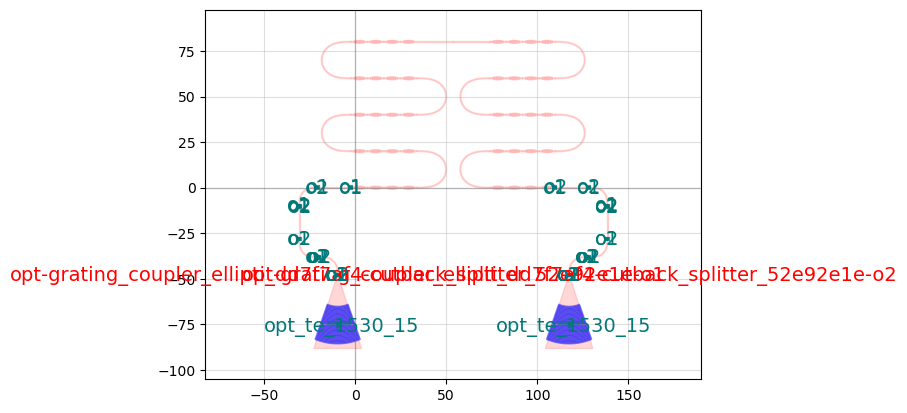

cutback_splitter_52e92e_42263575: uid ee21f529, ports ['opt-grating_coupler_ellipti_dd7f7af4-cutback_splitter_52e92e1e-o1', 'opt-grating_coupler_ellipti_dd7f7af4-cutback_splitter_52e92e1e-o2'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'straight_3', 'straight_4', 'bend_euler_3', 'bend_euler_4', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_5', 'bend_euler_6', 'straight_8', 'straight_9', 'straight_10', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'cutback_splitter_1'], 0 polygons


In [4]:
cutbacks = gf.components.cutback_splitter(component=c)
cutbacks = gf.routing.add_fiber_array(cutbacks, with_loopback = False)
cutbacks

## Using Components
### TODO: Add section about connecting components together, demonstrate making a mzi.
### TODO: Show how to connect it to grating couplers
### TODO: Add section about exporting components as a gds  

## Ideas for practice
### TODO: Create a 2x2 mmi complete with ports and correct layers using only polygons
### TODO: Create a directional coupler circuit using only gdsfactory default components
### TODO: 

## References